-- when having too many columns; consider performing feature selection.


In [97]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import gdown
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

warnings.filterwarnings("ignore")
pd. set_option('display.max_columns', None)

In [2]:
file_id = "1YFXl0Bh34au4qnwHjkibmAbAZOPCcD-o"
output_file = "train.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

Downloading...
From: https://drive.google.com/uc?id=1YFXl0Bh34au4qnwHjkibmAbAZOPCcD-o
To: /content/train.csv
100%|██████████| 4.08M/4.08M [00:00<00:00, 37.5MB/s]


'train.csv'

#Loading Dataset

In [3]:
# Load the dataset
fake_news_data = pd.read_csv('train.csv')
fake_news_data.head(10)

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,NaN,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971,_5_,"[1, 0]",_NEG_
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,NEGATIVE,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604,_6_,"[0, 1]",_NEG_
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",NEGATIVE,-0.2,0.2,0.021023,0.077569,0.032182,0.038037,0.438594,_2_,"[0, 1]",_NEG_
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,NEGATIVE,-0.3,0.3,0.116767,0.099105,0.219329,0.051303,0.114302,_7_,"[0, 1]",_NEG_
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,NEGATIVE,-0.4,0.4,0.163977,0.101336,0.109979,0.330754,0.203412,_8_,"[1, 0]",_NEG_


#EDA

## Heading 2

In [4]:
fake_news_data.shape

(11519, 25)

In [5]:
fake_news_data['sentiment_code'].value_counts()

sentiment_code
_NEG_    8564
_POS_    1414
Name: count, dtype: int64

In [6]:
fake_news_data.columns

Index(['ID', 'label', 'statement', 'subject', 'speaker', 'speaker_job',
       'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts',
       'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
       'context', 'sentiment', 'sentiment_score', 'sentiment_magnitude',
       'anger', 'fear', 'joy', 'disgust', 'sad', 'speaker_id', 'list',
       'sentiment_code'],
      dtype='object')

In [7]:
# Check for missing values
fake_news_data.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3239
state_info              2486
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  112
sentiment               1541
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1541
dtype: int64

#Data Cleaning

In [8]:
# Drop rows with missing values
fake_news_data.dropna(subset=['sentiment_code'], inplace=True)

In [9]:
fake_news_data.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             2806
state_info              2157
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                   92
sentiment                  0
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code             0
dtype: int64

In [10]:
fake_news_data.drop(columns=['speaker_job', 'state_info', 'sentiment_code', 'speaker_id', 'list', 'ID'], inplace=True)

In [11]:
fake_news_data.describe(include='all')

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
count,9978,9978,9978,9978,9978,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9886,9978,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
unique,6,9961,3748,2862,24,NaN,NaN,NaN,NaN,NaN,4250,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,half-true,On changing the rules for filibusters on presi...,health-care,barack-obama,republican,NaN,NaN,NaN,NaN,NaN,a news release,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2051,3,383,471,4414,NaN,NaN,NaN,NaN,NaN,242,8564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,11.570856,13.366907,17.087994,16.392864,6.240229,NaN,NaN,-0.343496,0.488585,0.162641,0.137699,0.169535,0.207079,0.319501
std,NaN,NaN,NaN,NaN,NaN,19.000114,24.262174,35.719718,36.025761,16.211644,NaN,NaN,0.340047,0.305794,0.117470,0.109094,0.154117,0.162688,0.169609
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-0.600000,0.300000,0.073903,0.062700,0.055778,0.079516,0.187175
50%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,1.000000,NaN,NaN,-0.400000,0.500000,0.133104,0.108012,0.120117,0.163496,0.296602
75%,NaN,NaN,NaN,NaN,NaN,12.000000,15.000000,13.000000,11.000000,5.000000,NaN,NaN,-0.200000,0.700000,0.222119,0.183604,0.234927,0.296648,0.429287


In [12]:
fake_news_data['context'].value_counts()

context
a news release                                                     242
an interview                                                       221
a press release                                                    209
a speech                                                           197
a TV ad                                                            185
                                                                  ... 
introduction to online petition to lower state's grocery taxes.      1
a talk show                                                          1
a surreptitiously recorded speech to donors at a fundraiser          1
a news release reacting to FitzGerald's run for governor             1
a speech on the economy                                              1
Name: count, Length: 4250, dtype: int64

In [13]:
# mode_value = fake_news_data['context'].mode
# print(mode_value)
fake_news_data['context'].fillna('a news release', inplace=True)

In [14]:
fake_news_data.isna().sum()

label                   0
statement               0
subject                 0
speaker                 0
party_affiliation       0
barely_true_counts      0
false_counts            0
half_true_counts        0
mostly_true_counts      0
pants_on_fire_counts    0
context                 0
sentiment               0
sentiment_score         0
sentiment_magnitude     0
anger                   0
fear                    0
joy                     0
disgust                 0
sad                     0
dtype: int64

In [15]:
filtered_df = fake_news_data[(fake_news_data['context'].isnull())]
filtered_df

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad


In [16]:
fake_news_data.head(5)

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,The Chicago Bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971


In [17]:
duplicates = fake_news_data[fake_news_data.duplicated()]
duplicates.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
4838,half-true,During Sherrod Browns past decade as a D.C. po...,"economy,job-accomplishments,jobs",josh-mandel,republican,4.0,5.0,4.0,5.0,6.0,a news release,NEGATIVE,-0.7,1.5,0.092383,0.071597,0.054982,0.285451,0.728939


In [18]:
fake_news_data.drop_duplicates(inplace=True)

In [19]:
fake_news_data.describe()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
mean,11.571615,13.367746,17.089305,16.394006,6.240253,-0.343460,0.488484,0.162648,0.137706,0.169547,0.207071,0.319460
std,19.000916,24.263245,35.721268,36.027386,16.212456,0.340046,0.305642,0.117474,0.109098,0.154121,0.162694,0.169568
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.900000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,0.300000,0.073903,0.062698,0.055789,0.079504,0.187159
50%,2.000000,2.000000,3.000000,3.000000,1.000000,-0.400000,0.500000,0.133117,0.108030,0.120118,0.163490,0.296537
75%,12.000000,15.000000,13.000000,11.000000,5.000000,-0.200000,0.700000,0.222208,0.183607,0.234936,0.296650,0.429246
max,70.000000,114.000000,160.000000,163.000000,105.000000,0.900000,7.100000,0.931034,0.931034,0.918537,0.931034,0.963480


In [20]:
fake_news_data.dtypes

label                    object
statement                object
subject                  object
speaker                  object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
sentiment                object
sentiment_score         float64
sentiment_magnitude     float64
anger                   float64
fear                    float64
joy                     float64
disgust                 float64
sad                     float64
dtype: object

In [21]:
# Check the shape of the data
fake_news_data.shape

fake_news_drop = fake_news_data
fake_news_drop

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,The Chicago Bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,a press conference,NEGATIVE,-0.2,0.2,0.039024,0.103790,0.104699,0.046181,0.758238
11515,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy,NEGATIVE,-0.7,0.7,0.064967,0.180882,0.074947,0.054953,0.710395
11516,true,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,none,0.0,1.0,0.0,2.0,0.0,a television ad,NEGATIVE,-0.8,0.8,0.085547,0.053017,0.248317,0.319548,0.354095
11517,false,A new poll shows 62 percent support the presid...,health-care,americans-united-change,none,1.0,4.0,4.0,1.0,0.0,an Internet ad.,POSITIVE,0.1,0.5,0.074988,0.148645,0.316695,0.062320,0.169428


In [22]:
# Preprocess the 'statement' column (lowercase, remove punctuation, etc.)
# fake_news_drop['statement'] = fake_news_drop['statement'].apply(lambda x: x.lower())
# fake_news_drop.head(10)

In [23]:
#Remove puntuations
import re

def remove_puntuation(text):
    return re.sub(r'[^\w\s]', '', text)

fake_news_data['statement'] = fake_news_data['statement'].apply(remove_puntuation)

In [24]:
fake_news_data['statement'] = fake_news_data['statement'].str.lower()

In [25]:
fake_news_data.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,says the annies list political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NEGATIVE,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,when did the decline of coal start it started ...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NEGATIVE,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
2,mostly-true,hillary clinton agrees with john mccain by vot...,foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NEGATIVE,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453
3,false,health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,NEGATIVE,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,the chicago bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,NEGATIVE,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971


In [26]:
# Analyze the distribution of classes (labels)
fake_news_drop['label'].value_counts()

label
half-true      2050
false          1933
mostly-true    1915
barely-true    1678
true           1576
pants-fire      825
Name: count, dtype: int64

In [27]:
# Analyze the distribution of classes (party_affiliation)
fake_news_drop['party_affiliation'].value_counts()

party_affiliation
republican                      4413
democrat                        3229
none                            1699
organization                     207
independent                      143
newsmaker                         54
libertarian                       42
activist                          37
journalist                        35
columnist                         33
talk-show-host                    24
state-official                    18
labor-leader                      12
tea-party-member                   9
business-leader                    9
education-official                 3
green                              3
liberal-party-canada               1
government-body                    1
Moderate                           1
democratic-farmer-labor            1
ocean-state-tea-party-action       1
constitution-party                 1
county-commissioner                1
Name: count, dtype: int64

In [28]:
# Split 'subject' column by comma
fake_news_drop['subject'] = fake_news_drop['subject'].str.split(',')

# Explode the resulting list so that each element becomes a separate row
fake_news_subject = fake_news_drop.explode('subject')

# Group by 'subject' and count occurrences
subject_counts = fake_news_subject.groupby('subject').size().reset_index(name='counts')
subject_counts

,subject,counts
0,10-news-tampa-bay,5
1,Alcohol,31
2,abc-news-week,92
3,abortion,255
4,afghanistan,39
...,...,...
137,wealth,49
138,weather,32
139,welfare,58
140,women,212


In [29]:
# Sort in descending order
subject_counts.sort_values(by='counts', ascending=False)

,subject,counts
64,health-care,1134
42,economy,1129
125,taxes,979
50,federal-budget,728
43,education,717
...,...,...
34,death-penalty,2
55,food,2
5,after-the-fact,2
52,fires,1


In [30]:
fake_news_drop.dtypes

label                    object
statement                object
subject                  object
speaker                  object
party_affiliation        object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
sentiment                object
sentiment_score         float64
sentiment_magnitude     float64
anger                   float64
fear                    float64
joy                     float64
disgust                 float64
sad                     float64
dtype: object

In [31]:
# Analyze the distribution of classes (speaker)
fake_news_drop['speaker'].value_counts()

speaker
barack-obama                   471
donald-trump                   275
hillary-clinton                235
mitt-romney                    167
john-mccain                    152
                              ... 
freedom-religion-foundation      1
mike-hymes                       1
dana-wachs                       1
amalgamated-transit-union        1
sal-esquivel                     1
Name: count, Length: 2862, dtype: int64

In [32]:
# Analyze the distribution of classes (sentiment)
fake_news_drop['sentiment'].value_counts()

sentiment
NEGATIVE    8563
POSITIVE    1414
Name: count, dtype: int64

In [33]:
fake_news_drop['sentiment'] = fake_news_drop['sentiment'].replace('POSITIVE', 'Genuine')
fake_news_drop['sentiment'] = fake_news_drop['sentiment'].replace('NEGATIVE', 'Fake')

In [34]:
fake_news_drop['sentiment'].value_counts()

sentiment
Fake       8563
Genuine    1414
Name: count, dtype: int64

## Outliers:

In [35]:
numerical_columns = fake_news_drop.select_dtypes(include='number').columns.tolist()
numerical_columns

['barely_true_counts',
 'false_counts',
 'half_true_counts',
 'mostly_true_counts',
 'pants_on_fire_counts',
 'sentiment_score',
 'sentiment_magnitude',
 'anger',
 'fear',
 'joy',
 'disgust',
 'sad']

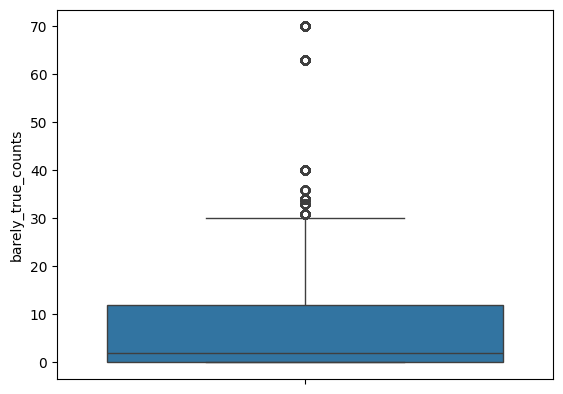

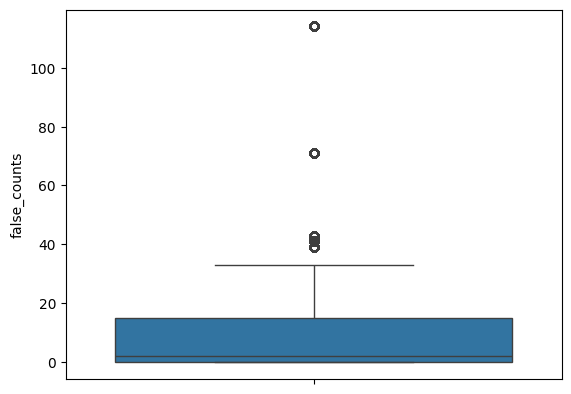

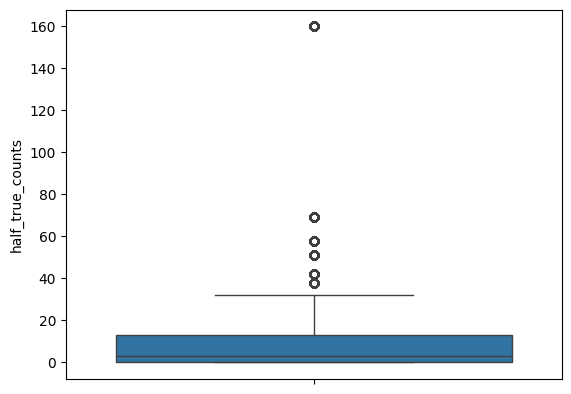

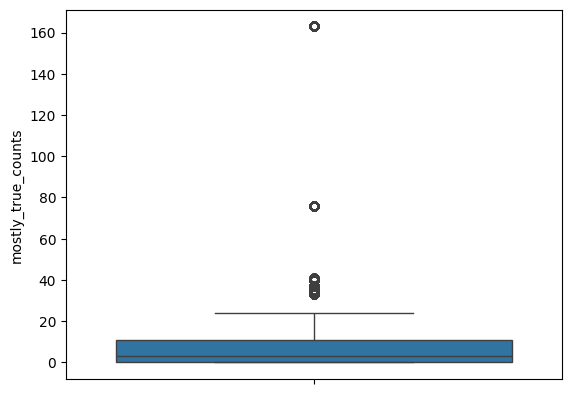

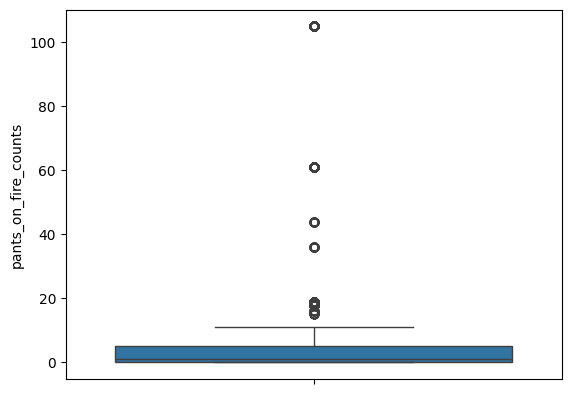

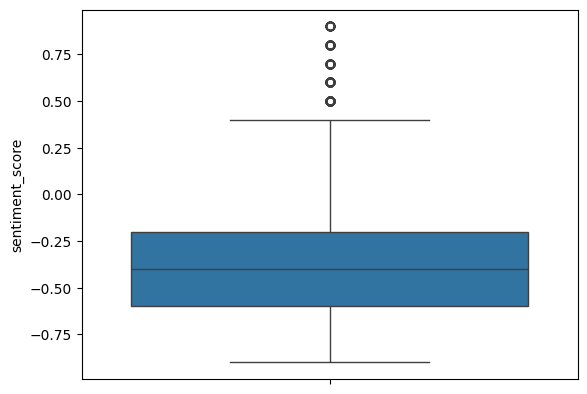

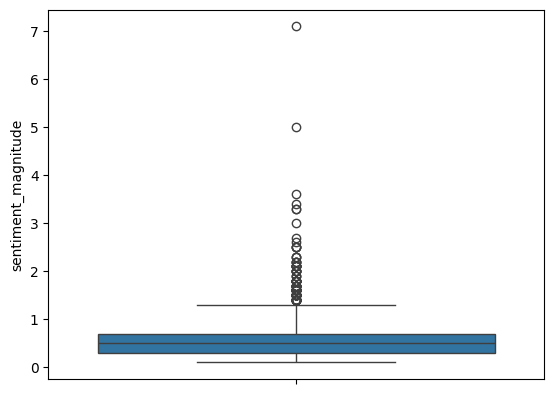

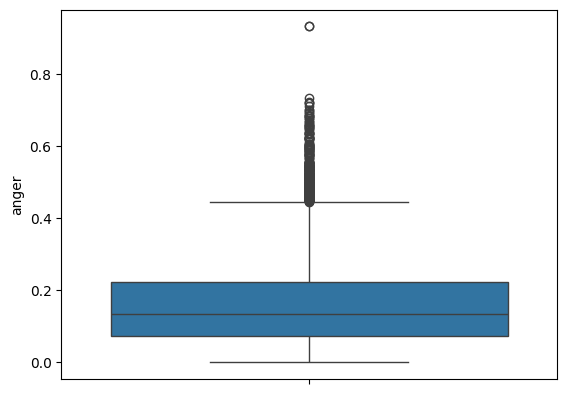

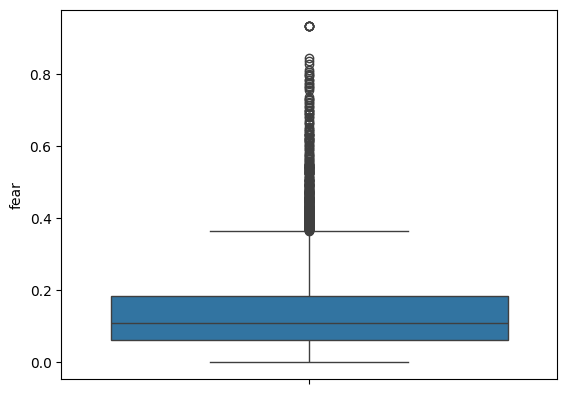

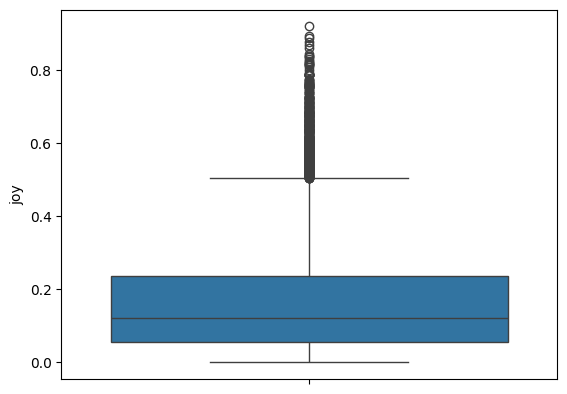

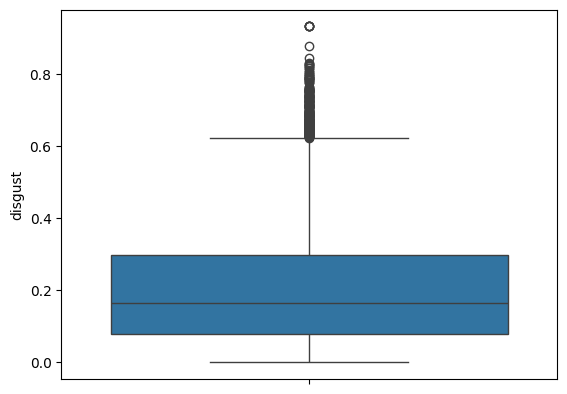

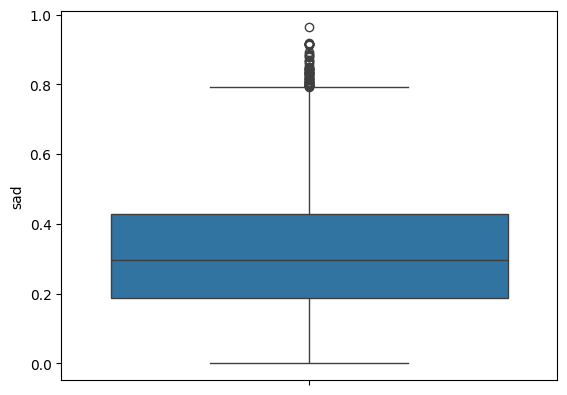

In [36]:
#boxplot
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_columns:
  column = fake_news_drop[i]
  sns.boxplot(column)
  plt.show()

In [37]:
fake_news_drop.shape

(9977, 19)

In [38]:
import numpy as np

def remove_outliers(df, columns, threshold=4):
    cleaned_df = df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(cleaned_df[col]):
            z_scores = np.abs((cleaned_df[col] - cleaned_df[col].mean()) / cleaned_df[col].std())
            cleaned_df = cleaned_df[z_scores < threshold]
    return cleaned_df

fake_news_filtered_data = remove_outliers(fake_news_drop, fake_news_drop.select_dtypes(include='number').columns.tolist())

In [39]:
fake_news_filtered_data.shape

(8707, 19)

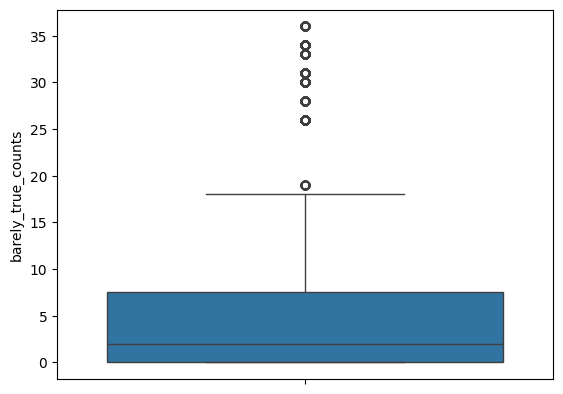

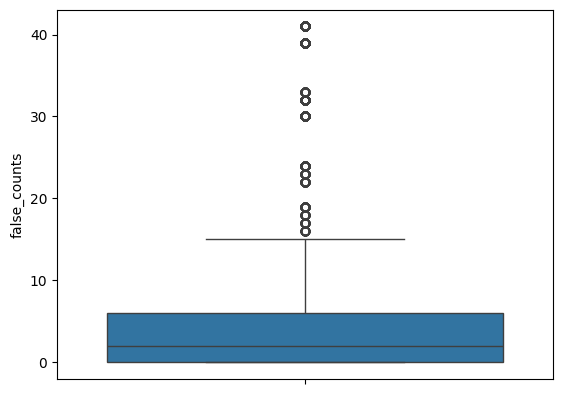

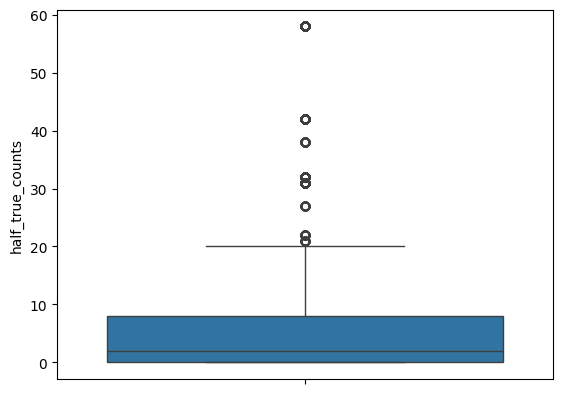

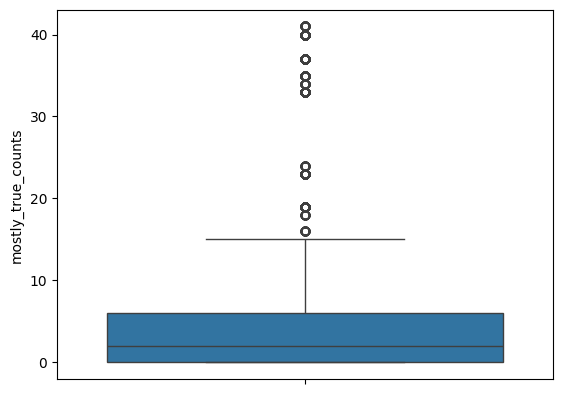

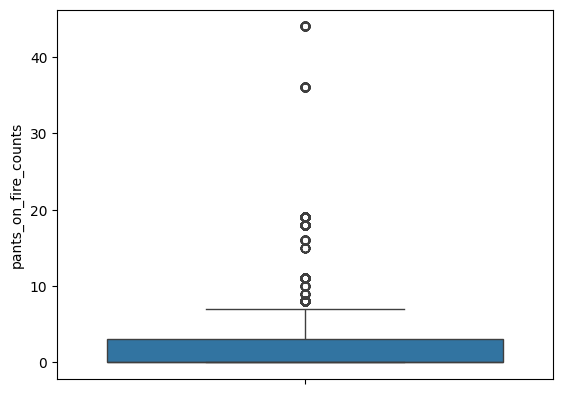

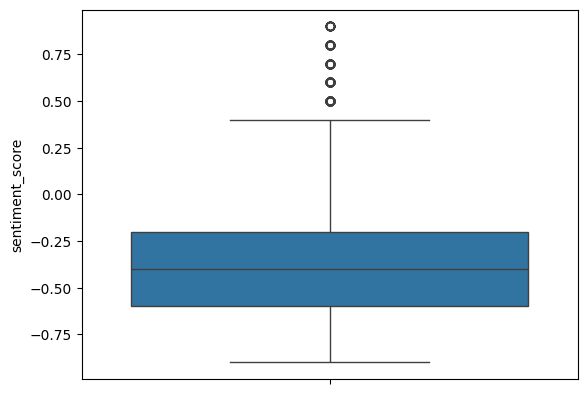

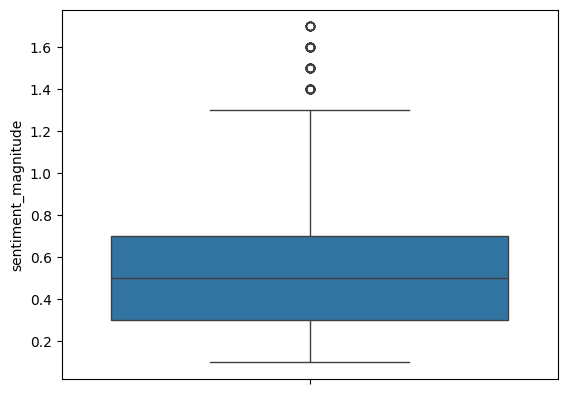

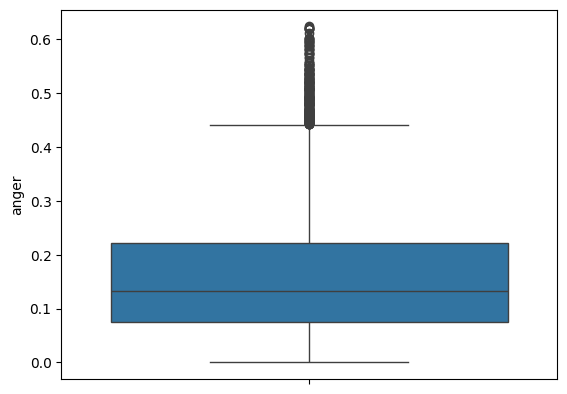

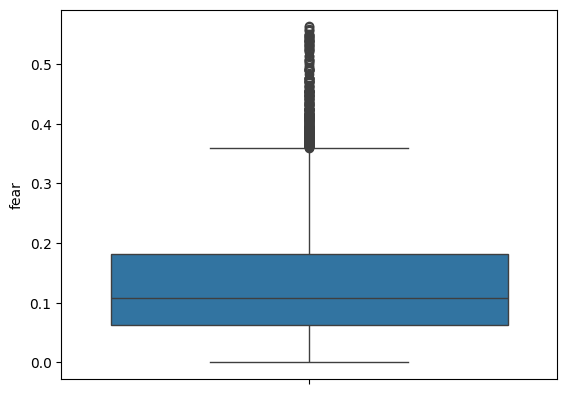

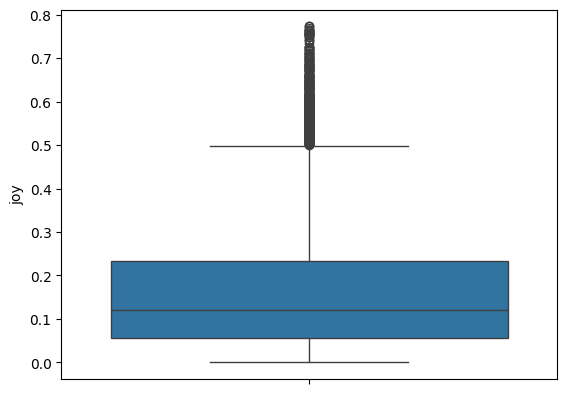

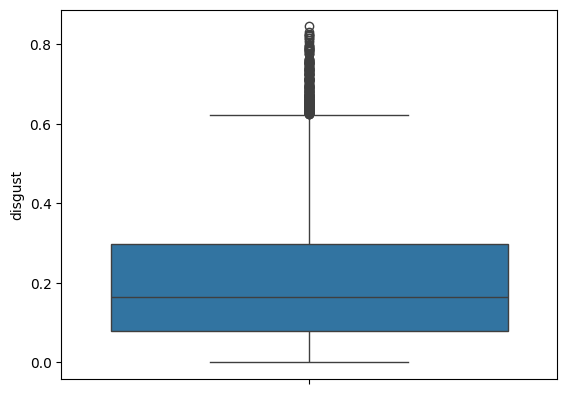

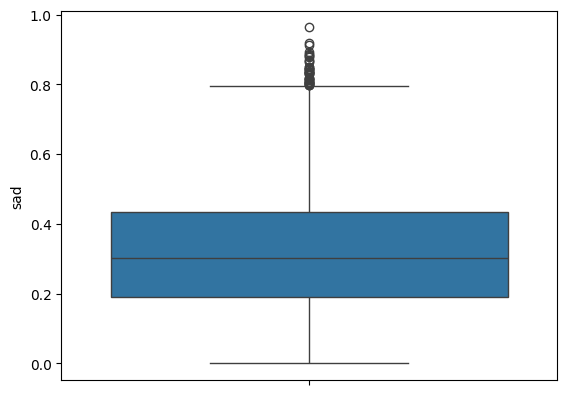

In [40]:
#boxplot
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_columns:
  column = fake_news_filtered_data[i]
  sns.boxplot(column)
  plt.show()

In [41]:
fake_news_filtered_data.to_csv("cleaned_data.csv", index=False)

#Data Visualization

In [42]:
fake_news_filtered_data.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,says the annies list political group supports ...,[abortion],dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,Fake,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,when did the decline of coal start it started ...,"[energy, history, job-accomplishments]",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,Fake,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
3,false,health care reform legislation is likely to ma...,[health-care],blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,Fake,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,the chicago bears have had more starting quart...,[education],robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,Fake,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971
6,barely-true,jim dunnam has not lived in the district he re...,[candidates-biography],republican-party-texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,Fake,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604


In [43]:
fake_news_finalized = fake_news_filtered_data.copy()

In [44]:
fake_news_finalized['subject'] = fake_news_finalized['subject'].apply(lambda x: ', '.join(map(str, x)))

In [45]:
fake_news_finalized.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,false,says the annies list political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,Fake,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,half-true,when did the decline of coal start it started ...,"energy, history, job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,Fake,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
3,false,health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,Fake,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,true,the chicago bears have had more starting quart...,education,robin-vos,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,Fake,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971
6,barely-true,jim dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,Fake,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604


In [46]:
def plot_heatmap(x):
    colormap = plt.cm.viridis
    plt.figure(figsize=(10,10))
    sns.heatmap(x.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

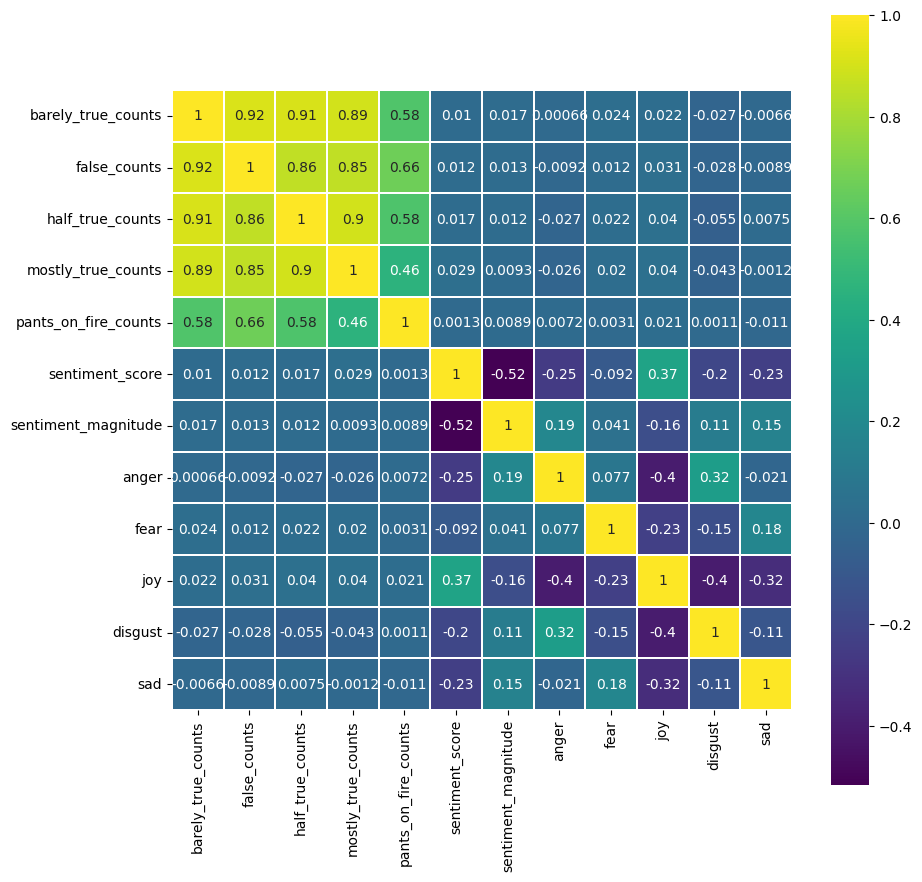

In [47]:
numeric_df_copy = fake_news_finalized.select_dtypes(include=['int', 'float']).copy()
plot_heatmap(numeric_df_copy)

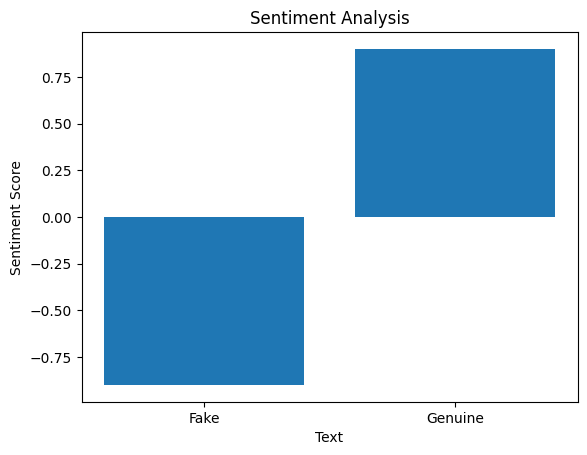

In [48]:
df = pd.DataFrame(fake_news_finalized)

# Create bar chart
plt.bar(df['sentiment'], df['sentiment_score'])
plt.title('Sentiment Analysis')
plt.xlabel('Text')
plt.ylabel('Sentiment Score')
plt.show()

In [49]:
def plot_Histogram(feature_name, dataFrameName):
      sns.set(style='ticks', palette='bright', font_scale=1)
      fig, ax=plt.subplots(figsize=(5,5))
      plt.hist(dataFrameName[feature_name], color='teal')
      plt.xlabel(feature_name)
      plt.ylabel('count')
      plt.xticks(rotation=45)
      plt.show()

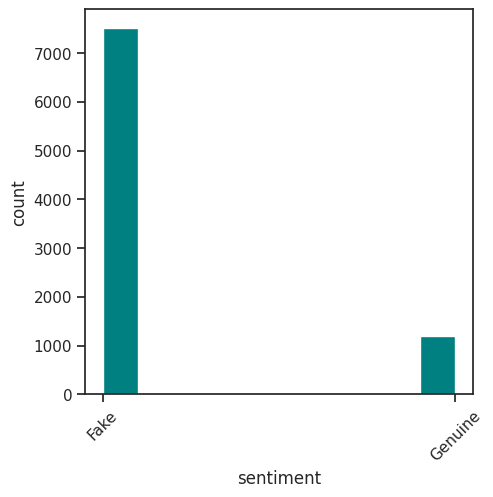

In [50]:
plot_Histogram('sentiment', fake_news_finalized)

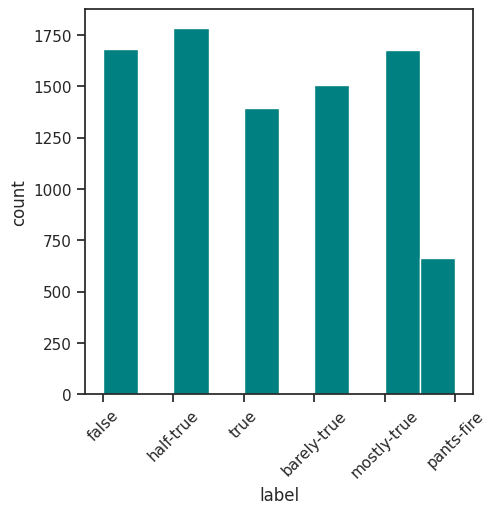

In [51]:
plot_Histogram('label', fake_news_finalized)

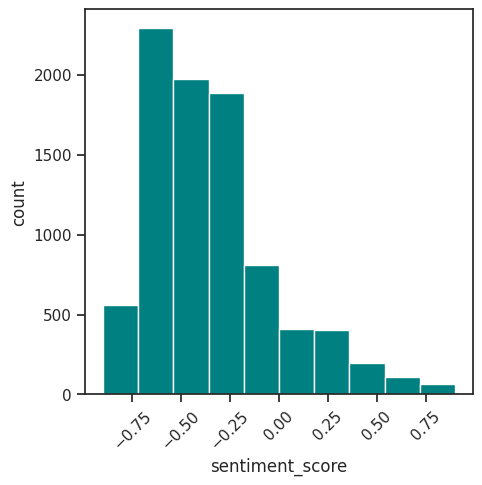

In [52]:
plot_Histogram('sentiment_score', fake_news_finalized)

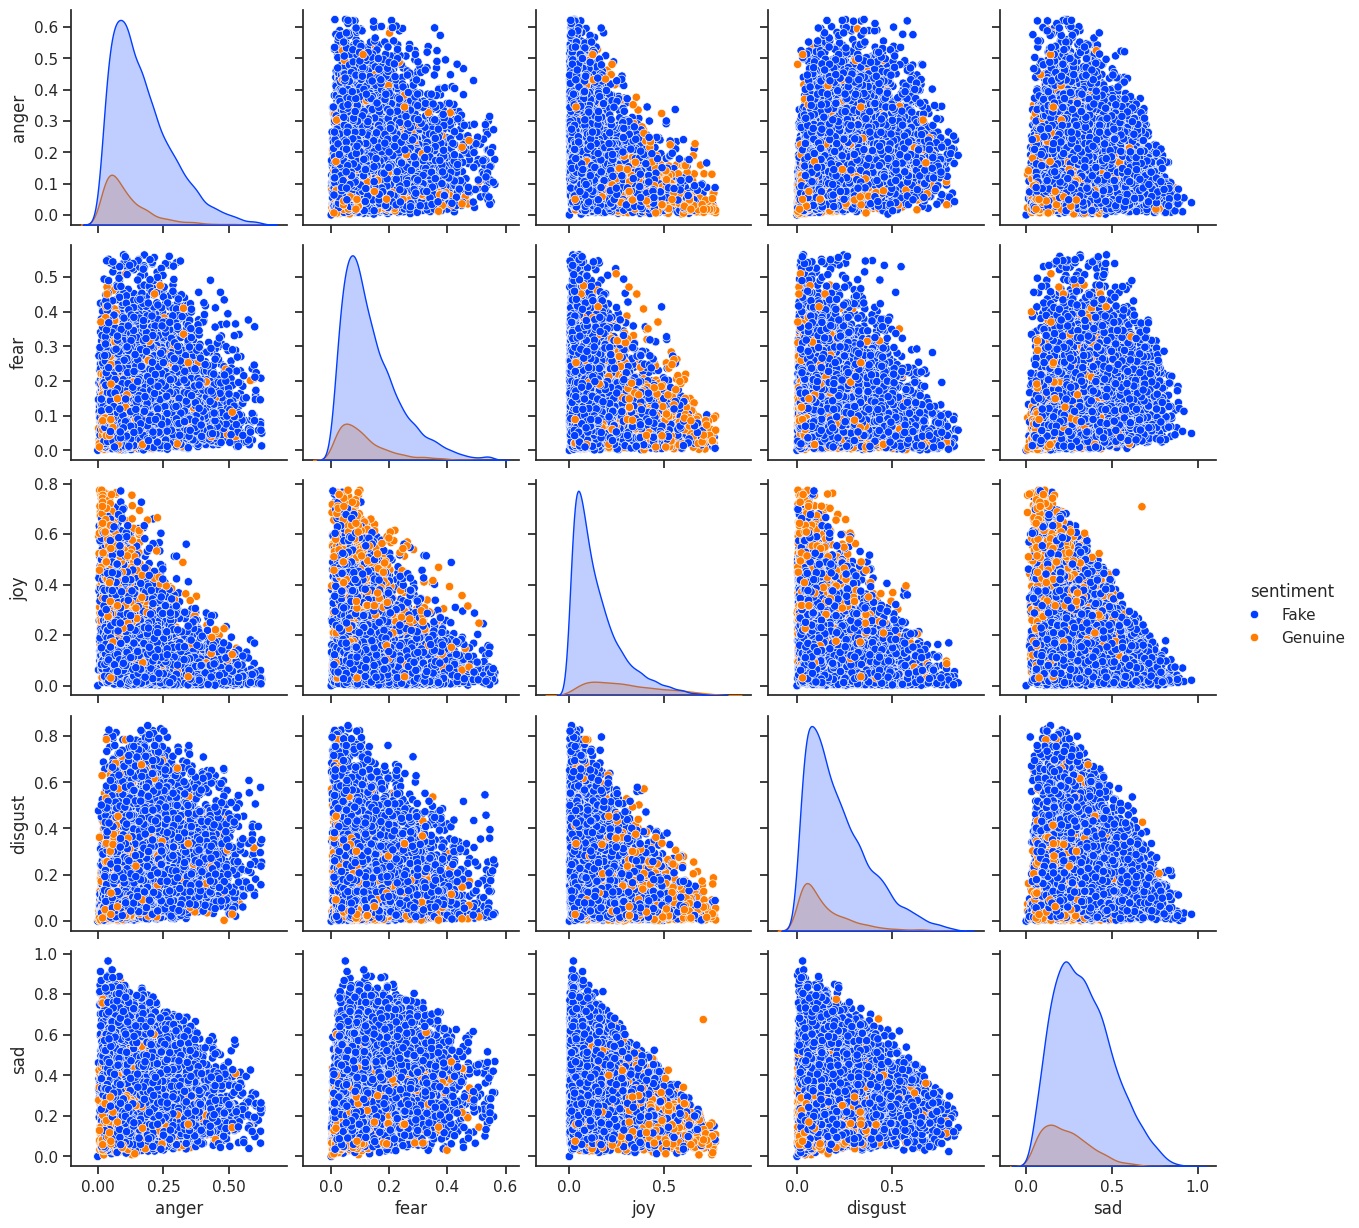

In [53]:
sns.pairplot(fake_news_finalized, hue='sentiment', vars=["anger","fear", "joy", "disgust", "sad"])

# Data Modeling

## Label Encoding

In [54]:
df_encoded = df.copy()
label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

In [55]:
df_encoded.head()

,label,statement,subject,speaker,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,sentiment,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad
0,1,5704,24,765,20,0.0,1.0,0.0,0.0,0.0,1140,0,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887
1,2,8395,2271,2422,6,0.0,0.0,1.0,1.0,0.0,1013,0,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045
3,1,1673,2730,263,17,7.0,19.0,3.0,5.0,44.0,1224,0,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403
5,5,6642,2035,2308,20,0.0,3.0,2.0,5.0,1.0,610,0,-0.3,0.3,0.044534,0.037243,0.294698,0.035936,0.598971
6,0,2450,416,2216,20,3.0,1.0,1.0,3.0,1.0,1396,0,-0.6,0.6,0.093937,0.019159,0.278842,0.110865,0.172604


## Data Preparation

In [77]:
def dataPreparation(df):
  x = df_encoded.drop(['sentiment'], axis=1)
  y = df_encoded[['sentiment']]
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=78)
  return X_train, X_test, y_train, y_test

In [59]:
X_train, X_test, y_train, y_test = dataPreparation(df_encoded)

## Feature Selection

In [68]:
def train_model(model_name, X_train, y_train):
        model = None # assign None to model variable
        if model_name == 'RandomForestClassifier':
            model = RandomForestClassifier()
        elif model_name == 'anova':
          select_k_best_anova = SelectKBest(f_classif, k=10)
          select_k_best_anova.fit(X_train, y_train)
          X_train = select_k_best_anova.transform(X_train)
        else:
          raise ValueError("Invalid model name.")

        if model is not None:
          model.fit(X_train, y_train)

        return model

def feature_imp(model_name, model, X_train):

        if model_name == 'RandomForestClassifier':
            feat_imp = model.feature_importances_
            feat_imp_sort = np.argsort(feat_imp)[::-1]
            feature_names = X_train.columns[feat_imp_sort]
            feature_scores = feat_imp[feat_imp_sort]
        elif model_name == 'anova':
            select_k_best = SelectKBest(f_classif, k=10)
            select_k_best.fit(X_train, y_train)
            X_axis = X_train.columns
            Y_axis = select_k_best.scores_
            feat_imp_sort = np.argsort(Y_axis)[::-1]
            feature_names = X_axis[feat_imp_sort]
            feature_scores = Y_axis[feat_imp_sort]
        else:
            raise ValueError('Invalid method specified.')

        print('\033[1m' + '\n The most important 20 features for ' + model_name + ': \n' + '\033[0m')
        names = []
        for i in range(10):
            print(i+1, '-', feature_names[i], ': ', feature_scores[i])
            names.append(feature_names[i])

        print('\033[1m')
        print(f"Plotting the Feature Importance Graph for the {model_name} :")
        print('\033[0m')
        figure(figsize=(8, 5), dpi=80)
        plt.barh(feature_names, feature_scores, color='teal')
        plt.title("Feature Importance - Top 20 Features", fontweight='bold')
        plt.grid(False)
        plt.show()
        return names


 The most important 20 features for RandomForestClassifier: 

1 - sentiment_score :  0.8417746687893882
2 - joy :  0.04163021157980897
3 - sentiment_magnitude :  0.02481052342707558
4 - sad :  0.016516872262234337
5 - anger :  0.015226585160649099
6 - disgust :  0.011505057897206622
7 - fear :  0.009300752417891557
8 - statement :  0.008766168285811938
9 - context :  0.005610357834858845
10 - subject :  0.005551626699178869

Plotting the Feature Importance Graph for the RandomForestClassifier :



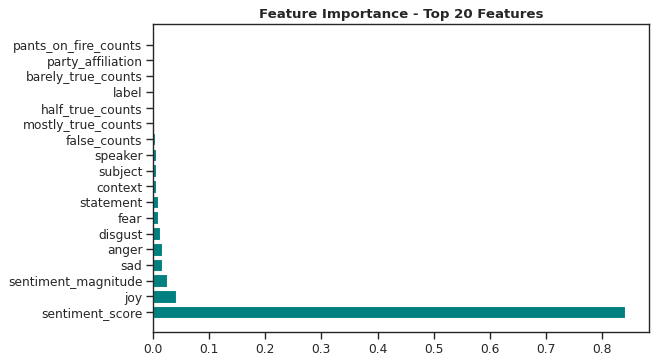

In [69]:
feature_list = []
model = train_model('RandomForestClassifier', X_train, y_train)

# Get the top 5 features
Top20_features = feature_imp('RandomForestClassifier', model, X_train)
top5_features = Top20_features[:6]

feature_list.append(top5_features)


 The most important 20 features for anova: 

1 - sentiment_score :  9849.971231764099
2 - joy :  882.3198670574999
3 - sentiment_magnitude :  332.94752257120894
4 - sad :  286.9893256282704
5 - anger :  216.3550986179011
6 - disgust :  142.194394005709
7 - fear :  63.86542937843641
8 - mostly_true_counts :  3.8469380228347445
9 - label :  3.6387408845772535
10 - statement :  2.9836898681495274

Plotting the Feature Importance Graph for the anova :



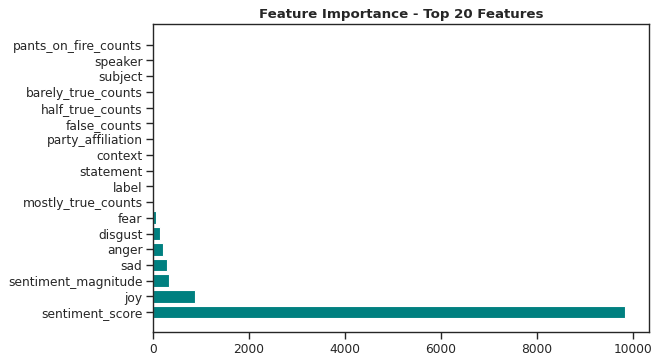

In [70]:
model = train_model('anova', X_train, y_train)

# Get the top 5 features
Top20_features = feature_imp('anova', model, X_train)
top5_features = Top20_features[:6]

feature_list.append(top5_features)

In [71]:
models = ['Random Forest Classifier', 'ANOVA']
print("Top 6 features for each model:\n")
for i, model_name in enumerate(models):
    print(f"{i+1}. {model_name}: {feature_list[i]}\n")

Top 6 features for each model:

1. Random Forest Classifier: ['sentiment_score', 'joy', 'sentiment_magnitude', 'sad', 'anger', 'disgust']

2. ANOVA: ['sentiment_score', 'joy', 'sentiment_magnitude', 'sad', 'anger', 'disgust']



## New Dataset:

In [91]:
new_fake_news = df_encoded[['sentiment_score', 'joy', 'sentiment_magnitude', 'sad', 'anger','sentiment','disgust']]

In [92]:
new_fake_news.head()

,sentiment_score,joy,sentiment_magnitude,sad,sentiment
0,-0.5,0.026096,0.5,0.531887,0
1,-0.4,0.191357,0.8,0.102045,0
3,-0.3,0.375055,0.3,0.383403,0
5,-0.3,0.294698,0.3,0.598971,0
6,-0.6,0.278842,0.6,0.172604,0


In [93]:
X_train, X_test, y_train, y_test = dataPreparation(new_fake_news)

In [94]:
def data_modeling(model_name, X_train, y_train, X_test, y_test):

    if model_name == 'RandomForestClassifier':
      model = RandomForestClassifier()

    elif model_name == 'LogisticRegression':
      model = LogisticRegression()

    else:
      print("No model defined")
      return

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    r2 = r2_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='micro')
    acc_score = accuracy_score(y_test, pred) * 100

    print('\033[1m')
    print(f"Testing Performance Metrics for the {model_name} :")
    print('\033[0m')
    print("                            R2: {:.2f}".format(r2))
    print("      Mean Squared Error (MSE): {:.2f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
    print("                      F1 Score: {:.2f}".format(f1))
    print("                      Accuracy: {:.2f}%".format(acc_score))
    plot(y_test, pred, model_name)

def plot(y_test, pred, model_name):

    # Generate confusion matrix
    cm = confusion_matrix(y_test, pred)
    print('\033[1m' + '\n Confusion Matrix ' + model_name + ': \n' + '\033[0m')
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for ' + model_name)
    plt.show()

    print("\n\n")

    #
    Actual_Pred = pd.DataFrame({'Actual': y_test['sentiment'], 'Predicted': pred.flatten()})
    Actual_Pred = Actual_Pred.head(25)
    round(Actual_Pred,2)
    Result = Actual_Pred[['Actual','Predicted']]
    Result = Result.reset_index(drop=True)
    Result.plot(marker='o',figsize=(8,5))
    plt.title('Actual vs Predicted', fontsize=5)
    plt.ylabel('sentiment', fontsize=4)
    plt.grid(False)
    plt.show()


Testing Performance Metrics for the RandomForestClassifier :

                            R2: 1.00
      Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
                      F1 Score: 1.00
                      Accuracy: 100.00%

 Confusion Matrix RandomForestClassifier: 



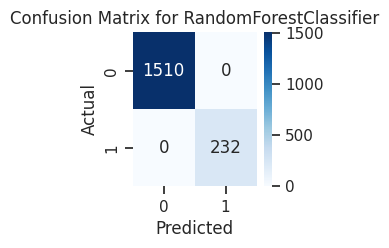

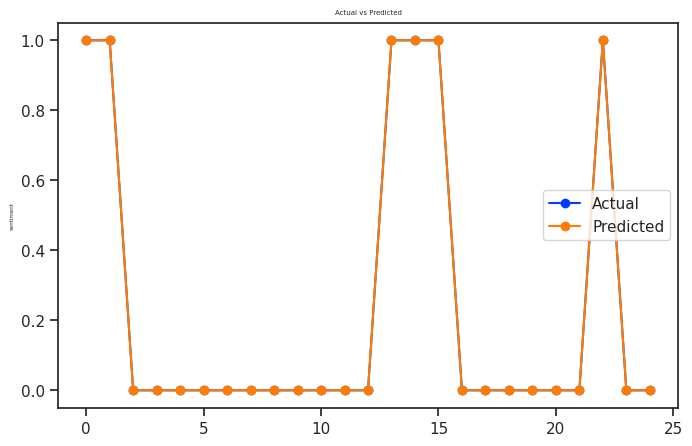

In [95]:
data_modeling('RandomForestClassifier', X_train, y_train, X_test, y_test)


Testing Performance Metrics for the LogisticRegression :

                            R2: 0.04
      Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33
                      F1 Score: 0.89
                      Accuracy: 88.92%

 Confusion Matrix LogisticRegression: 



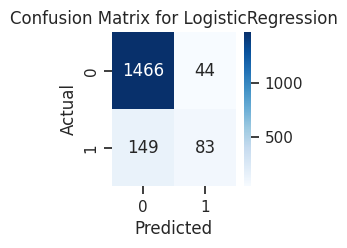

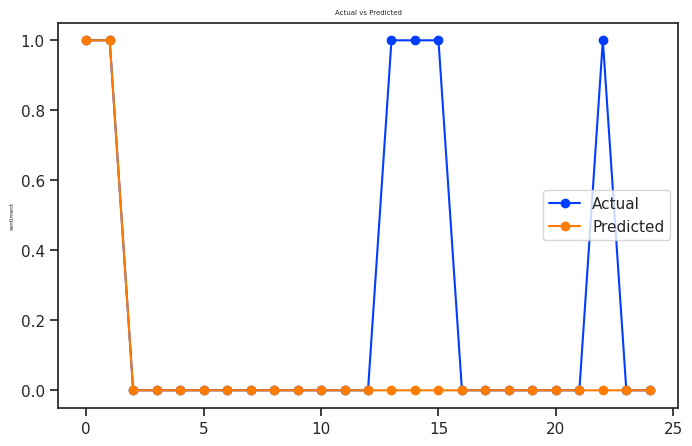

In [96]:
data_modeling('LogisticRegression', X_train, y_train, X_test, y_test)

## Deep Learning Model:

In [98]:
# Define the model - deep neural net
# input_number = len(X_train_resampled[0])
input_number = X_train.shape[1]
hidden_nodes_1 = 100
hidden_nodes_2 = 50
hidden_nodes_output = 1

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_1, activation="relu", input_dim=input_number))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_output, activation="sigmoid"))

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1900      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7001 (27.35 KB)
Trainable params: 7001 (27.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
# fit_model = nn_model.fit(X_train, y_train, epochs=25)
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
218/218 [==============================] - 1s 6ms/step - loss: 0.3034 - accuracy: 0.9045
Epoch 2/100
218/218 [==============================] - 1s 4ms/step - loss: 0.3206 - accuracy: 0.9014
Epoch 3/100
218/218 [==============================] - 1s 4ms/step - loss: 0.3079 - accuracy: 0.9088
Epoch 4/100
218/218 [==============================] - 1s 7ms/step - loss: 0.4097 - accuracy: 0.8907
Epoch 5/100
218/218 [==============================] - 1s 6ms/step - loss: 0.2897 - accuracy: 0.9106
Epoch 6/100
218/218 [==============================] - 1s 4ms/step - loss: 0.3520 - accuracy: 0.9078
Epoch 7/100
218/218 [==============================] - 1s 4ms/step - loss: 0.1906 - accuracy: 0.9301
Epoch 8/100
218/218 [==============================] - 1s 4ms/step - loss: 0.2343 - accuracy: 0.9215
Epoch 9/100
218/218 [==============================] - 1s 4ms/step - loss: 0.1995 - accuracy: 0.9242
Epoch 10/100
218/218 [==============================] - 1s 6ms/step - loss: 0.1842 - accura

In [102]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

55/55 - 0s - loss: 0.0393 - accuracy: 0.9954 - 91ms/epoch - 2ms/step
Loss: 0.03934217989444733, Accuracy: 0.9954075813293457


## Resampling the dataset

In [87]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest classifier on the balanced training data
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Data Evaluation

---
### Heading:
  - point 1
  - pointers 2

---